<a href="https://colab.research.google.com/github/navyakarna/3D-MODEL-USING-GEN-AI-/blob/main/image_classification_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP TO SOLVE , IMAGE CLASSIFICATIOM USING PYTORCH

1. LOADING DATASET
2. PRE - PROCESSING THE DATA
3. CREATING TRAINING AND VALIDATION SET
4. DEFINING THE MODEL ARCH
5. COMPILING THE MODEL ARCH (LOSS , AND OPTIMIZERS)
6. TRAINING THE MODEL
7. EVLAUTAING MODEL PERFORMANCE
8. HYPERPARAMETER TUNING



In [2]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
from zipfile import ZipFile

# Specify the path to your zip file
zip_file_path = '/content/RSeKNqHaROqx8hMcig62_Emergency Vs Non-Emergency Vehicle Dataset (1).zip'

# Specify the directory where you want to extract the contents
extract_to_path = '/content/'

# Open the zip file
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to_path)

print(f"Extracted files to {extract_to_path}")

Extracted files to /content/


In [5]:
data = pd.read_csv('/content/Dataset/emergency_classification.csv')

In [6]:
seed = 42

In [7]:
data.head()

image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1

In [8]:
X = []

for img_name in data.image_names:
  img = plt.imread('/content/Dataset/images/' + img_name)

  img = img/255
  X.append(img)

X = np.array(X)
y = data.emergency_or_not.values

In [9]:
X.shape

(2352, 224, 224, 3)

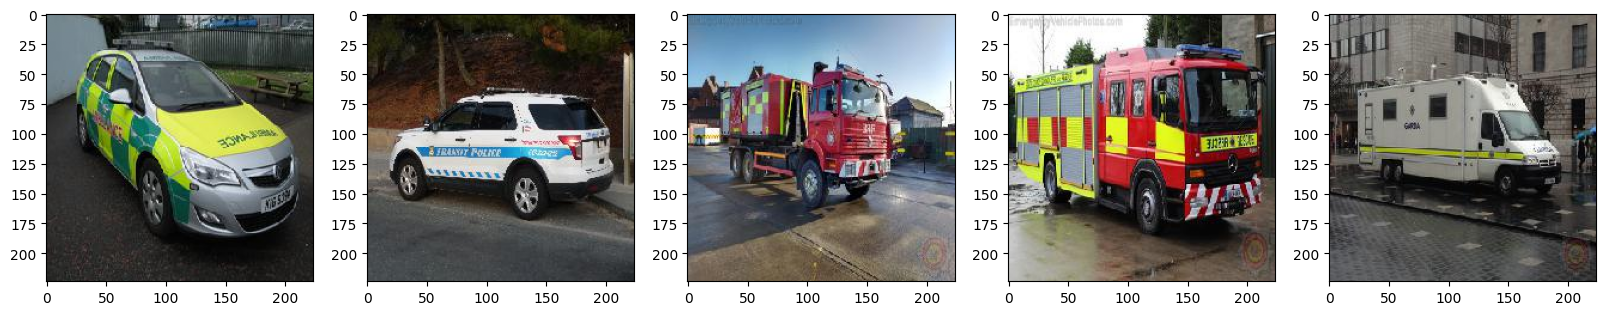

In [10]:
fig ,axes = plt.subplots(ncols=5, figsize=(20,10))
for i in range(5):
  axes[i].imshow(X[i])

In [13]:
#pre process the data

X = X.reshape(-1, 224*224*3).astype('float32')
X.shape

(2352, 150528)

In [14]:
#create tarin and validation set

X_train, X_valid , y_train, y_valid = train_test_split(X, y , test_size=0.3, random_state=seed, stratify=y)

In [15]:
(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

((1646, 150528), (706, 150528), (1646,), (706,))

In [16]:
import torch

In [17]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)

X_valid = torch.FloatTensor(X_valid)
y_valid = torch.FloatTensor(y_valid)

In [18]:
#definig model arch

import torch.nn as nn
from torch.nn import Linear , Sigmoid , Sequential

In [26]:
class Net(nn.Module):
  def __init__(self): # Changed Self to self
    super(Net , self).__init__()

    self.linear_layers = Sequential(
        Linear(X_train.shape[1], 100),
        Sigmoid(),
        Linear(100,1),
        Sigmoid())

  def forward(self, x): # Added self as the first argument
    x = self.linear_layers(x)
    return x # Added return statement to return the output

Compiling the model

In [27]:
from torch.nn import BCELoss
from torch.optim import Adam

In [29]:
torch.manual_seed(32)

model = Net()

optimizer = Adam(model.parameters(), lr = 0.01)
criterion = BCELoss()

if torch.cuda.is_available():
  model = model.cuda()
  criterion = criterion.cuda()

print(model)

Net(
  (linear_layers): Sequential(
    (0): Linear(in_features=150528, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


Training the model

In [35]:
# batch size of the model
batch_size = 64

for epoch in tqdm(range(50)):
    # setting initial loss as 0
    train_loss = 0.0

    # to randomly pick the images without replacement in batches
    permutation = torch.randperm(X_train.size()[0])

    # to keep track of training loss
    training_loss = []

    # for loop for training on batches
    for i in range(0,X_train.size()[0], batch_size):

        # defining the training phase
        model.train()

        # taking the indices from randomly generated values
        indices = permutation[i:i+batch_size]

        # getting the images and labels for a batch
        batch_x, batch_y = X_train[indices], y_train[indices]

        if torch.cuda.is_available():
            batch_x, batch_y = batch_x.cuda(), batch_y.cuda()

        # clearing all the accumulated gradients
        optimizer.zero_grad()

        # mini batch computation
        outputs = model(batch_x)

        # calculating the loss for a mini batch
        loss = criterion(outputs.squeeze(),batch_y)

        # storing the loss for every mini batch
        training_loss.append(loss.item())

        # calculating the gradients
        loss.backward()

        # updating the parameters
        optimizer.step()

    training_loss = np.average(training_loss)
    if epoch%10 == 0:
        # printing the loss
        print('epoch: \t', epoch, '\t training loss: \t', training_loss)



  2%|▏         | 1/50 [00:01<01:01,  1.25s/it]

epoch: 	 0 	 training loss: 	 0.7954828647466806


 22%|██▏       | 11/50 [00:11<00:43,  1.11s/it]

epoch: 	 10 	 training loss: 	 0.6862226999722995


 42%|████▏     | 21/50 [00:21<00:28,  1.00it/s]

epoch: 	 20 	 training loss: 	 0.6823848371322339


 62%|██████▏   | 31/50 [00:32<00:19,  1.01s/it]

epoch: 	 30 	 training loss: 	 0.6906910790846899


 82%|████████▏ | 41/50 [00:43<00:09,  1.03s/it]

epoch: 	 40 	 training loss: 	 0.6864985021261069


100%|██████████| 50/50 [00:52<00:00,  1.06s/it]
